#### Question 1: using the “classes to clusters evaluation”, run HierarchicalClusterer on the Iris data using single linkage and complete linkage. Which one led to better result? Can you explain why?

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline

In [39]:
# loading the data
irisdf = pd.read_csv('iris.csv')
irisdf.shape

(150, 5)

In [3]:
irisdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
irisdf['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [40]:
iris_arr = irisdf.iloc[:,:-1].values
iris_arr[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

#### SINGLE LINKAGE

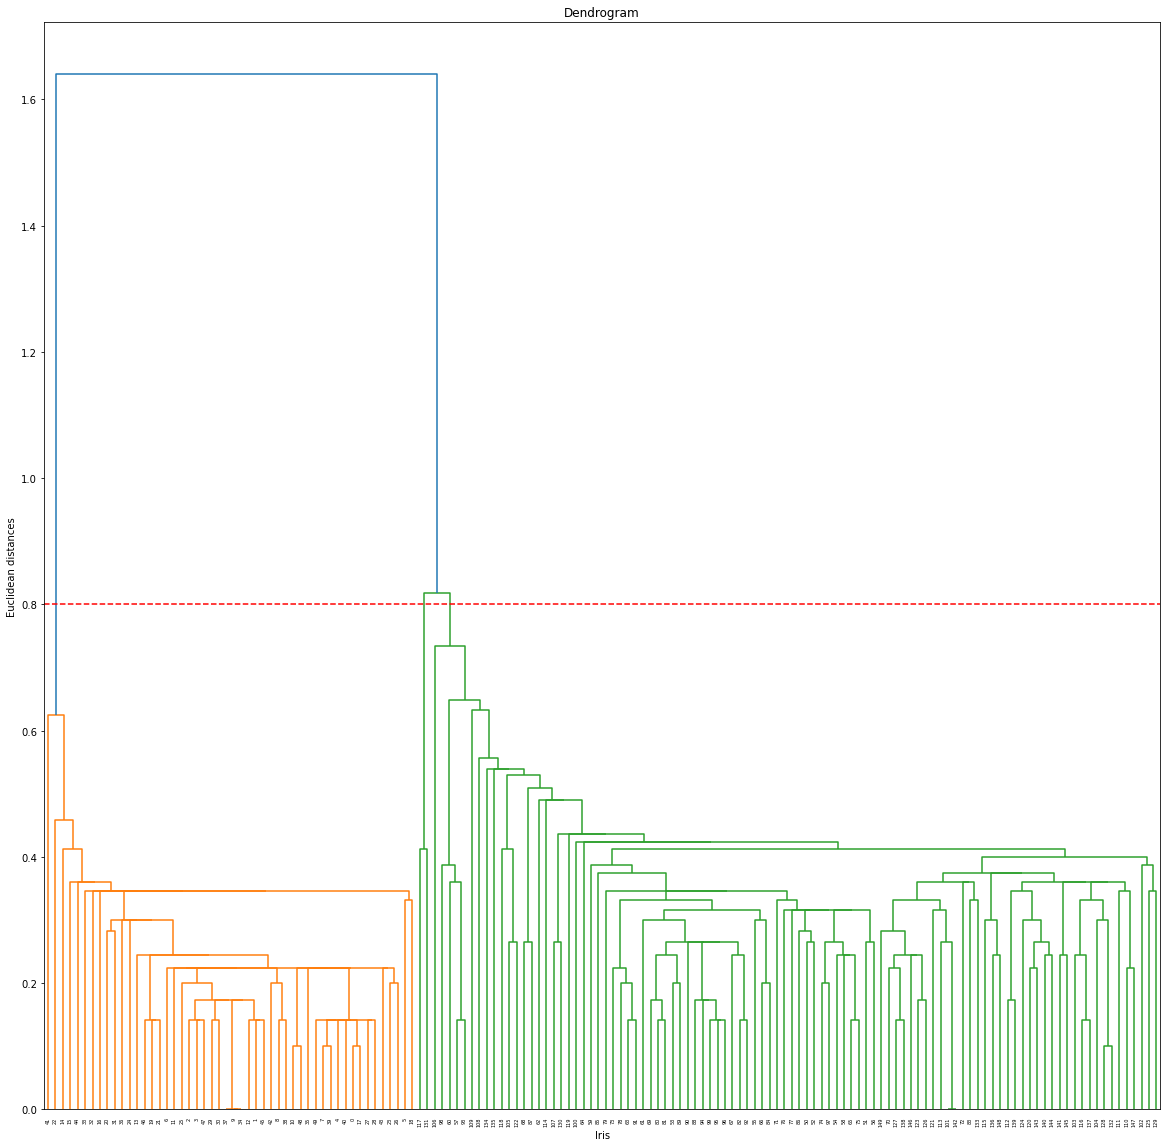

In [42]:
# dendogram to find number of clusters
plt.figure(figsize=(20, 20))  

dendrogram = sch.dendrogram(sch.linkage(iris_arr, method  = "single"), 
                            orientation='top')
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.axhline(y=0.8, color='r', linestyle='--')

#### From the above dendogram, we can conclude that 3 clustering can be possible

In [43]:
# Fitting hierarchical clustering to the Iris dataset
single_linkage_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='single')
irisdf['single_predicted'] = single_linkage_clustering.fit_predict(iris_arr)
irisdf['single_predicted'][:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: single_predicted, dtype: int64

In [44]:
confustion_matrix = pd.crosstab(irisdf['class'],irisdf['single_predicted'],rownames=['Actual'],colnames=['Predicted'])
confustion_matrix

Predicted,0,1,2
Actual,,,
Iris-setosa,0,50,0
Iris-versicolor,50,0,0
Iris-virginica,48,0,2


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

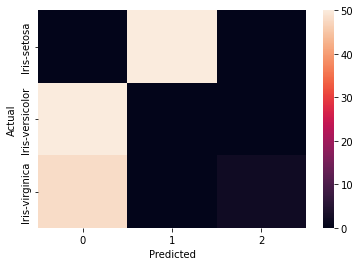

In [45]:
sns.heatmap(confustion_matrix)

In [48]:
# replacing predicted cluster numbers with class attribute
irisdf['single_predicted'].replace([0,1,2],['Iris-versicolor','Iris-setosa','Iris-virginica'],inplace=True)

In [49]:
matrix = confusion_matrix(irisdf['class'],irisdf['single_predicted'])
print('Confusion matrix : \n',matrix)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(irisdf['class'],irisdf['single_predicted'])
print('Classification report : \n',matrix)

Confusion matrix : 
 [[50  0  0]
 [ 0 50  0]
 [ 0 48  2]]
Classification report : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.51      1.00      0.68        50
 Iris-virginica       1.00      0.04      0.08        50

       accuracy                           0.68       150
      macro avg       0.84      0.68      0.58       150
   weighted avg       0.84      0.68      0.58       150



#### COMPLETE LINKAGE

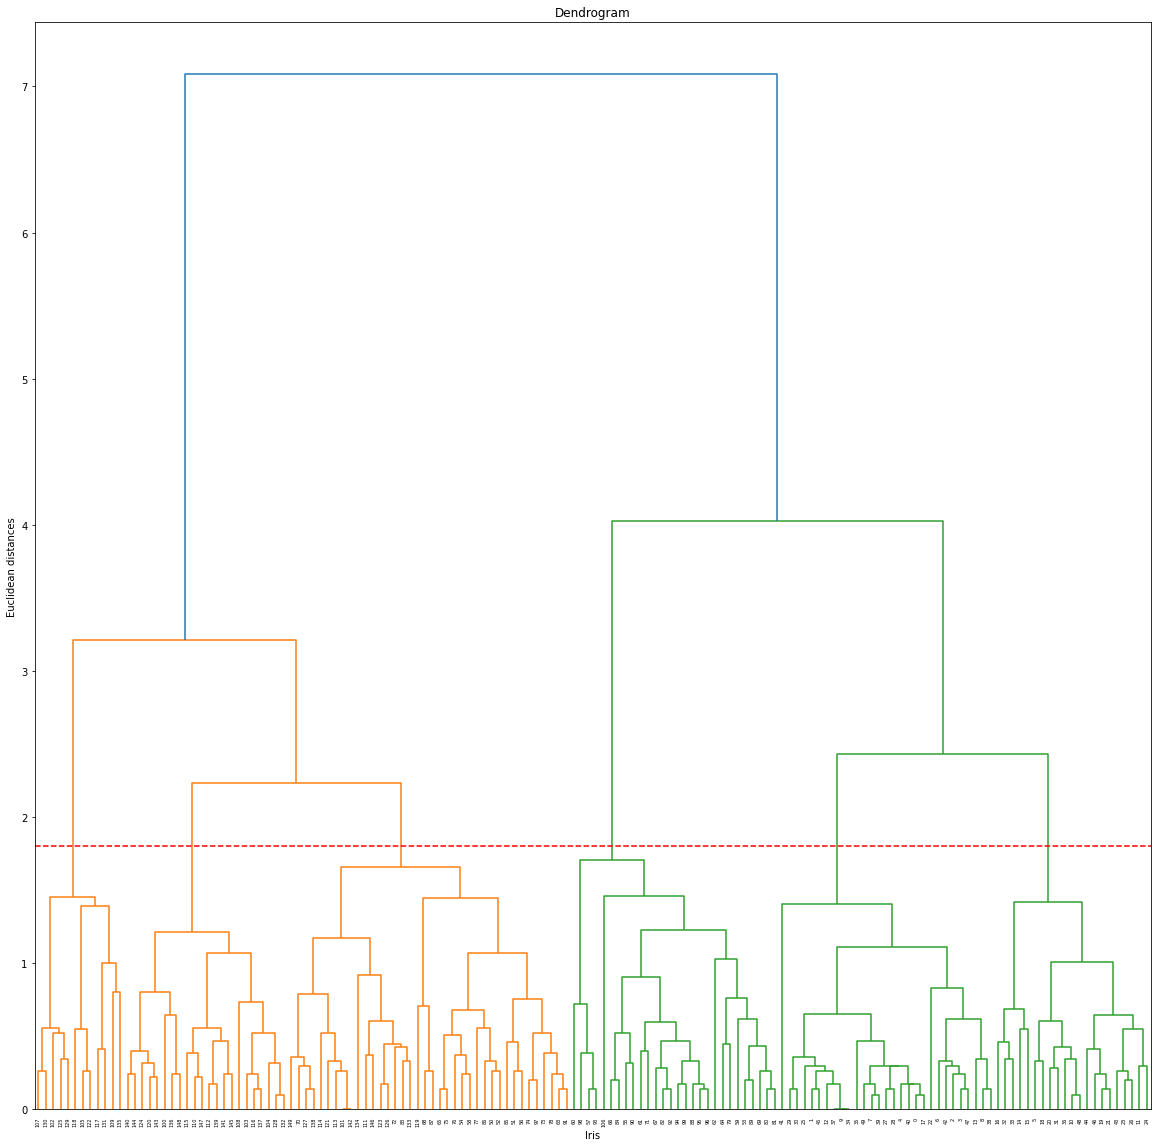

In [50]:
# dendogram to find number of clusters
plt.figure(figsize=(20, 20))  

dendrogram_comp = sch.dendrogram(sch.linkage(iris_arr, method  = "complete"), 
                            orientation='top')
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.axhline(y=1.8, color='r', linestyle='--')

#### From the above dendogram, we can conclude that 6 clustering can be possible

In [59]:
#4 Fitting hierarchical clustering to the Iris dataset
complete_linkage_clustering = AgglomerativeClustering(n_clusters = 6, affinity = 'euclidean', linkage ='complete')
irisdf['complete_predicted'] = complete_linkage_clustering.fit_predict(iris_arr)
irisdf['complete_predicted'][:10]

0    4
1    4
2    4
3    4
4    4
5    3
6    4
7    4
8    4
9    4
Name: complete_predicted, dtype: int64

In [60]:
completelink_matrix = pd.crosstab(irisdf['class'],irisdf['complete_predicted'],rownames=['Actual'],colnames=['Predicted'])
completelink_matrix

Predicted,0,1,2,3,4,5
Actual,,,,,,
Iris-setosa,0,0,0,21,29,0
Iris-versicolor,27,0,23,0,0,0
Iris-virginica,1,12,15,0,0,22


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

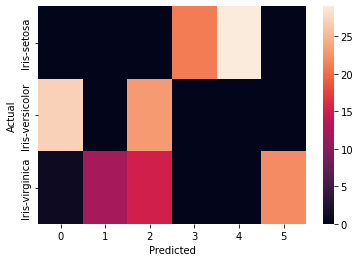

In [61]:
sns.heatmap(completelink_matrix)

### CONCLUSION

According to confustion matrix, Complete Linkage performed much better in clustering Iris-versicolor compared to Single Linkage
